In [1]:
import pandas as pd
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [2]:
print(df)


         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [3]:
df["gender"].replace({"Male": 1, "Female": 0}, inplace=True)
df["gender"].replace({"Male": 1, "Female": 0}, inplace=True)
df["ever_married"].replace({"Yes": 1, "No": 0}, inplace=True)
df["work_type"].replace({"Self-employed": 0, "Govt_job": 1,"Private":2,"children":-1,"Never_worked" : -2}, inplace=True)
df["Residence_type"].replace({"Rural": 0, "Urban": 1}, inplace=True)
df["smoking_status"].replace({"never smoked": 0, "formerly smoked":1,"smokes":2}, inplace=True)
df = df.dropna()
df = df[df.smoking_status!="Unknown"]
df = df[df.smoking_status!="Other"]
df["smoking_status"].apply(int)
print(df.bmi)
print(df)

0       36.6
2       32.5
3       34.4
4       24.0
5       29.0
        ... 
5100    28.3
5102    21.7
5106    40.0
5107    30.6
5108    25.6
Name: bmi, Length: 3426, dtype: float64
         id gender   age  hypertension  heart_disease  ever_married  \
0      9046      1  67.0             0              1             1   
2     31112      1  80.0             0              1             1   
3     60182      0  49.0             0              0             1   
4      1665      0  79.0             1              0             1   
5     56669      1  81.0             0              0             1   
...     ...    ...   ...           ...            ...           ...   
5100  68398      1  82.0             1              0             1   
5102  45010      0  57.0             0              0             1   
5106  44873      0  81.0             0              0             1   
5107  19723      0  35.0             0              0             1   
5108  37544      1  51.0            

In [64]:
print(df.dtypes)

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'stroke'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

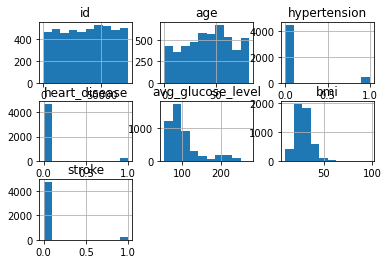

In [85]:
df.hist()

In [107]:
temp = []

for i in df["smoking_status"].values:
    #print(i)
    if i not in temp:
        temp.append( i )
print(temp)

[1, 0, 2]


In [70]:
import torch 
import numpy as np
def sigmoid(value):
    #must be none array
    return 1/(1+np.exp(-value))
def sigmoidder(value):
    return sigmoid(value)*(1-sigmoid(value))
class neuron():
    def __init__(self,sizeweight):
        self._size = sizeweight
        self._weights = torch.tensor(np.random.uniform(-1,1,sizeweight))
        self._batchUpdate = torch.tensor(np.zeros(sizeweight))
    def forward(self, inputtensor):
        inputtensor = inputtensor.to(torch.float64)
        output = torch.matmul(inputtensor,self._weights)
        
        output = sigmoid(output.item())
        return output
    def backprop(self,error,firstweights,output):
        sigder = sigmoidder(output)
        for i in range(self._size):
            self._batchUpdate[i] += error*sigder*firstweights[i] * lr
            #print(error*sigder*firstweights[i])
    def update(self):
        for i in range(self._size):
            self._weights[i] = self._batchUpdate[i]
        self._batchUpdate = torch.tensor(np.zeros(self._size))
        
temp = neuron(9)
temp.forward(torch.tensor([0,5,3,2,4,5,2,3,1]))

0.08638156714977442

In [66]:
inputt = torch.tensor([ 0.0884,  0.8455,  0.7856,  0.9237,  0.2631, -0.7903, -0.3475,  0.4791,
        -0.1002], dtype=torch.float64)
temp = neuron(9)
lr = 0.01
for i in range(10):
    output = temp.forward(inputt)
    target = 1
    error = target - output
    print(error)
    temp.backprop(error,inputt,output)
    temp.update()
    print(temp._weights)

tensor([-0.5995, -0.9746, -0.5167,  0.7632, -0.3979,  0.6438, -0.6984, -0.4395,
         0.5066], dtype=torch.float64)
0.7703164715115639
tensor([ 0.0002,  0.0016,  0.0015,  0.0018,  0.0005, -0.0015, -0.0007,  0.0009,
        -0.0002], dtype=torch.float64)
0.49845708495527774
tensor([ 0.0001,  0.0010,  0.0009,  0.0011,  0.0003, -0.0009, -0.0004,  0.0006,
        -0.0001], dtype=torch.float64)
0.4990494236225689
tensor([ 0.0001,  0.0010,  0.0009,  0.0011,  0.0003, -0.0009, -0.0004,  0.0006,
        -0.0001], dtype=torch.float64)
0.499048155604652
tensor([ 0.0001,  0.0010,  0.0009,  0.0011,  0.0003, -0.0009, -0.0004,  0.0006,
        -0.0001], dtype=torch.float64)
0.4990481583192996
tensor([ 0.0001,  0.0010,  0.0009,  0.0011,  0.0003, -0.0009, -0.0004,  0.0006,
        -0.0001], dtype=torch.float64)
0.4990481583134879
tensor([ 0.0001,  0.0010,  0.0009,  0.0011,  0.0003, -0.0009, -0.0004,  0.0006,
        -0.0001], dtype=torch.float64)
0.49904815831350036
tensor([ 0.0001,  0.0010,  0.0009

In [66]:
Y_col = 'stroke'
df = df.loc[:, df.columns!='id']
X_cols = df.loc[:, df.columns != Y_col].columns
print(X_cols)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[X_cols], df[Y_col],test_size=0.2, random_state=42)

In [68]:
print(len(y_train))

2740


In [69]:
print(X_train.iloc[5][0])

1


In [64]:
import numpy as np
epochs = 20
trainSize = len(X_train)
lr = 0.0001
global lr
temp = neuron(10)
X_trainnp = X_train.to_numpy()
Y_trainnp = y_train.to_numpy()
batchSize = 256
for epochNum in range(epochs):
    sampleOrder = np.arange(trainSize)
    np.random.shuffle(sampleOrder)
    totalerror = 0
    for batchNum in range(trainSize//batchSize + 1):
        batchInd = sampleOrder[:batchSize]
        sampleOrder = sampleOrder[batchSize:]
        batch = X_trainnp[batchInd,:]
        batchTarget = Y_trainnp[batchInd]
        #print(batch)
        for i in range(len(batch)):
            #print(batch[i])
            batchinput = torch.Tensor(np.float64(batch[i]))
            output = temp.forward(batchinput)
            error = batchTarget[i] - output
            totalerror += error
            temp.backprop(error,batch[i],output)
        temp.update()
    totalerror = totalerror/trainSize
    print(totalerror)
    

tensor([ 0.0099, -0.7184, -0.2273,  0.9030,  0.3660,  0.2992,  0.6727, -0.9302,
         0.4540,  0.1953], dtype=torch.float64)
-0.40901936009827455
-0.4797926613286948
-0.4124649749179131
-0.4717599057432798
-0.41383211052698377
-0.47351237171244137
-0.40932129974825493
-0.47927035422221415
-0.4114373522105062
-0.47383204624211117
-0.41362215503788824
-0.46774794374839607
-0.4133619916792591
-0.4772863263176049
-0.4100225273457496
-0.47600156821580814
-0.41072368648927
-0.4780627209692115
-0.40985444001568716
-0.46960150905340503


In [71]:
import torch 
import numpy as np
lr = 0.01
global lr
def sigmoid(value):
    #must be none array
    return 1/(1+np.exp(-value))
def sigmoidder(value):
    return sigmoid(value)*(1-sigmoid(value))
class neuron():
    def __init__(self,sizeweight):
        self._size = sizeweight
        self._weights = torch.tensor(np.random.uniform(-1,1,sizeweight))
        self._batchUpdate = torch.tensor(np.zeros(sizeweight))
        self._bias = torch.tensor(np.random.uniform(-1,1))
        self._batchBias = 0
    def forward(self, inputtensor):
        #print(inputtensor)
        inputtensor = inputtensor.to(torch.float64)
        try:
            output = torch.matmul(inputtensor,self._weights)
        except:
            print(inputtensor.shape,self._weights.shape)
        output += self._bias
        output = sigmoid(output.item())
        return output
    def backprop(self,error,firstweights,output):
        sigder = sigmoidder(output)
        for i in range(self._size):
            self._batchUpdate[i] += torch.squeeze(error*sigder*firstweights[i] * lr)
            self._batchBias += error * sigder*1*lr
            #print(error*sigder*firstweights[i])
    def update(self):
        for i in range(self._size):
            self._weights[i] = self._batchUpdate[i]
        self._bias += torch.squeeze(self._batchBias)
        self._batchUpdate = torch.tensor(np.zeros(self._size))
        self.batchBias = 0
class Layer():
    def __init__(self,width,depth):
        #width is number of neurons depth is size of neuron, remember from cv that depth is the 
        self._width = width
        self._depth = depth
        self._neurons = []
        for i in range(width):
            self._neurons.append(neuron(depth))
    def forward(self,inputtensor):
        output = torch.zeros(self._width)
        
        for i in range(self._width):
            output[i] = self._neurons[i].forward(inputtensor)
        return output
    def backprop(self,error,layerinputtensor,output):
        #for this one error is an array
        #an erorr is calculated by the sum of the neuron output's weights in the next layer * error for each next layer neuron.
        #thus an error exists for each neuron within the layer
        #for simplicity sake the error is calculated outside of backprop
        for i in range(self._width):
            self._neurons[i].backprop(error[i],layerinputtensor,output[i])
        #remember layerinputtensor is fed into all tensors
    def update(self):
        for i in range(self._width):
            self._neurons[i].update()
class Model():
    def __init__(self):
        self._layers = []
        self._layers.append(Layer(20,10))
        self._layers.append(Layer(10,20))
        self._layers.append(Layer(1,10))
        self.size = len(self._layers)
    def retrieve(self,layerno,neuronno,weightno):
        #literally does what u think it does retreives weight from Model[layerno][neuronno][weightno]
        return self._layers[layerno]._neurons[neuronno]._weights[weightno]
    def forward(self,trainrow,target):
        
        internals = [trainrow]
        for i in range(len(self._layers)):
            
            internals.append(self._layers[i].forward(internals[-1]))
            
            #print(output.shape)
        #print(internals)
        error = target - internals[-1]
        errorstorage = [0 for i in range(self.size)]

        for i in range(self.size-1,-1,-1):
            #i here represents the layer to calculate the error for
            #print("i",i)
            #need to calculate individual error for each layer
            if i == len(self._layers)-1:
                errorstorage[i] = [error]
            else:
                temperrorarray = torch.zeros(self._layers[i]._width)
                for j in range(0,self._layers[i]._width):
                    #print("j",j)
                    #j here goes through every neuron in the layer to calculate error
                    #print(temperrorarray)
                    for k in range(self._layers[i+1]._width):
                        #print(k)
                        #print(temperrorarray[k])
                        #k goes through the neurons with calculated errors in the next layer
                        temperrorarray[j] += torch.squeeze(errorstorage[i+1][k]*self.retrieve(i+1,k,j),dim=0)
                errorstorage[i]=temperrorarray
        #print("errorstorage",errorstorage)
        for i in range(self.size):
            self._layers[i].backprop(errorstorage[i],internals[i],internals[i+1])
        return internals[-1]
    def update(self):
        for i in range(self.size):
            self._layers[i].update()
testinput = torch.tensor([ 0.0099, -0.7184, -0.2273,  0.9030,  0.3660,  0.2992,  0.6727, -0.9302,0.4540,  0.1953], dtype=torch.float64)
testModel = Model()
print(type(testModel))
for i in range(10):
    print(testModel.forward(testinput,1))
    testModel.update()
    print(testModel.forward(testinput,1))


<class '__main__.Model'>
tensor([0.3564])
tensor([0.5179])
tensor([0.5179])
tensor([0.5279])
tensor([0.5279])
tensor([0.5428])
tensor([0.5428])
tensor([0.5629])
tensor([0.5629])
tensor([0.5877])
tensor([0.5877])
tensor([0.6165])
tensor([0.6165])
tensor([0.6485])
tensor([0.6485])
tensor([0.6826])
tensor([0.6826])
tensor([0.7178])
tensor([0.7178])
tensor([0.7528])


In [75]:
import numpy as np
epochs = 20
trainSize = len(X_train)
lr = 0.0001
global lr
X_trainnp = X_train.to_numpy()
Y_trainnp = y_train.to_numpy()
testModel = Model()
batchSize = 256
for epochNum in range(epochs):
    print(epochNum)
    sampleOrder = np.arange(trainSize)
    np.random.shuffle(sampleOrder)
    totalerror = 0
    for batchNum in range(trainSize//batchSize + 1):
        batchInd = sampleOrder[:batchSize]
        sampleOrder = sampleOrder[batchSize:]
        batch = X_trainnp[batchInd,:]
        batchTarget = Y_trainnp[batchInd]
        #print(batch)
        for i in range(len(batch)):
            #print(batch[i])
            batchinput = torch.Tensor(np.float64(batch[i]))
            output = testModel.forward(batchinput,batchTarget[i])
            error = batchTarget[i] - output
            totalerror += abs(error)
            #temp.backprop(error,batch[i],output)
        testModel.update()
    totalerror = totalerror/trainSize
    print(totalerror)
    

0
tensor([0.4128])
1
tensor([0.1159])
2
tensor([0.0546])
3
tensor([0.0501])
4
tensor([0.0497])
5
tensor([0.0496])
6
tensor([0.0496])
7
tensor([0.0496])
8
tensor([0.0496])
9
tensor([0.0496])
10
tensor([0.0496])
11
tensor([0.0496])
12
tensor([0.0496])
13
tensor([0.0497])
14
tensor([0.0497])
15
tensor([0.0505])
16
tensor([0.0604])
17
tensor([0.1783])
18
tensor([0.4685])
19
tensor([0.3188])
